# Importing Libraries

In [ ]:
import os,shutil
from tensorflow.keras import layers
from tensorflow.keras import models
from keras import optimizers
from keras.preprocessing.image import ImageDataGenerator

# Creating paths and Making Directories

In [2]:
original_dataset_dir = r'D:\huzaifa\PIAIC\Quater3\cats and dogs\dogs-vs-cats\train\train'

In [3]:
base_dir = 'D:\huzaifa\PIAIC\Quater3\cats and dogs\dogs-vs-cats'

In [4]:
train_dir = os.path.join(base_dir, 'train_data')

validation_dir = os.path.join(base_dir, 'validation_data')

test_dir = os.path.join(base_dir, 'test_data')

In [ ]:
os.mkdir(train_dir)
os.mkdir(validation_dir)
os.mkdir(test_dir)

In [6]:
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

test_cats_dir = os.path.join(test_dir, 'cats')
test_dogs_dir = os.path.join(test_dir, 'dogs')

In [ ]:
os.mkdir(train_cats_dir)
os.mkdir(train_dogs_dir)
os.mkdir(validation_cats_dir)
os.mkdir(validation_dogs_dir)
os.mkdir(test_cats_dir)
os.mkdir(test_dogs_dir)

# copying data

In [10]:
fnames = [f'cat.{i}.jpg' for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_cats_dir, fname)
    shutil.copyfile(src, dst)

In [12]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_cats_dir, fname)
    shutil.copyfile(src, dst)

In [13]:
fnames = ['cat.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_cats_dir, fname)
    shutil.copyfile(src, dst)

In [14]:
fnames = ['dog.{}.jpg'.format(i) for i in range(1000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(train_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1000, 1500)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(validation_dogs_dir, fname)
    shutil.copyfile(src, dst)

fnames = ['dog.{}.jpg'.format(i) for i in range(1500, 2000)]
for fname in fnames:
    src = os.path.join(original_dataset_dir, fname)
    dst = os.path.join(test_dogs_dir, fname)
    shutil.copyfile(src, dst)

# Model Architecture

In [8]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [9]:
 model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

In [10]:
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

C:\Users\DELL\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [11]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(train_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(validation_dir,target_size=(150, 150),batch_size=20,class_mode='binary')

Found 1000 images belonging to 2 classes.


In [13]:
history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,
                              validation_steps=50)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7680\501769390.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,


Epoch 1/30
100/100 [==============================] - 131s 1s/step - loss: 0.6895 - acc: 0.5350 - val_loss: 0.6765 - val_acc: 0.6310
Epoch 2/30
100/100 [==============================] - 75s 755ms/step - loss: 0.6516 - acc: 0.6295 - val_loss: 0.6392 - val_acc: 0.6630
Epoch 3/30
100/100 [==============================] - 75s 752ms/step - loss: 0.6028 - acc: 0.6765 - val_loss: 0.6265 - val_acc: 0.6440
Epoch 4/30
100/100 [==============================] - 77s 766ms/step - loss: 0.5693 - acc: 0.7015 - val_loss: 0.6018 - val_acc: 0.6650
Epoch 5/30
100/100 [==============================] - 81s 815ms/step - loss: 0.5400 - acc: 0.7280 - val_loss: 0.6099 - val_acc: 0.6790
Epoch 6/30
100/100 [==============================] - 81s 809ms/step - loss: 0.5080 - acc: 0.7565 - val_loss: 0.5660 - val_acc: 0.7000
Epoch 7/30
100/100 [==============================] - 76s 757ms/step - loss: 0.4837 - acc: 0.7650 - val_loss: 0.6447 - val_acc: 0.6670
Epoch 8/30
100/100 [==============================] - 79s

# Visualizing the model Performence During training

<Figure size 432x288 with 0 Axes>

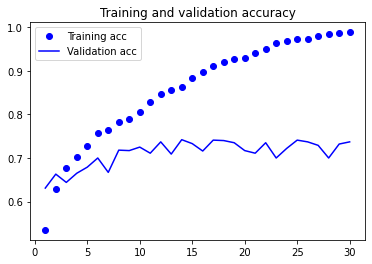

<Figure size 432x288 with 0 Axes>

In [14]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

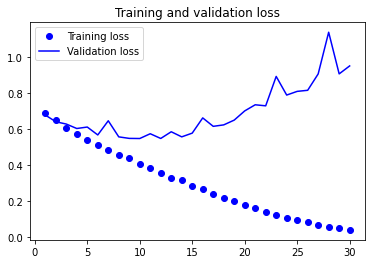

In [15]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

# Data Augmentation

In [21]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
rescale=1./255,
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [26]:
train_generator = train_datagen.flow_from_directory(
train_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')
validation_generator = test_datagen.flow_from_directory(
validation_dir,
target_size=(150, 150),
batch_size=20,
class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


# Model Architecture with dropout layer

In [31]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [32]:
from keras import optimizers
model.compile(loss='binary_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4),metrics=['acc'])

In [33]:
history = model.fit_generator(
train_generator,
steps_per_epoch=100,
epochs=100,
validation_data=validation_generator,
validation_steps=50)

C:\Users\DELL\AppData\Local\Temp\ipykernel_7680\786575719.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/100
100/100 [==============================] - 75s 734ms/step - loss: 0.6949 - acc: 0.5170 - val_loss: 0.6826 - val_acc: 0.5070
Epoch 2/100
100/100 [==============================] - 74s 737ms/step - loss: 0.6844 - acc: 0.5385 - val_loss: 0.6690 - val_acc: 0.5960
Epoch 3/100
100/100 [==============================] - 84s 840ms/step - loss: 0.6661 - acc: 0.5900 - val_loss: 0.6793 - val_acc: 0.5640
Epoch 4/100
100/100 [==============================] - 92s 917ms/step - loss: 0.6532 - acc: 0.6065 - val_loss: 0.7098 - val_acc: 0.5800
Epoch 5/100
100/100 [==============================] - 94s 936ms/step - loss: 0.6388 - acc: 0.6325 - val_loss: 0.6050 - val_acc: 0.6670
Epoch 6/100
100/100 [==============================] - 93s 927ms/step - loss: 0.6242 - acc: 0.6460 - val_loss: 0.5934 - val_acc: 0.6800
Epoch 7/100
100/100 [==============================] - 93s 928ms/step - loss: 0.6126 - acc: 0.6575 - val_loss: 0.6178 - val_acc: 0.6610
Epoch 8/100
100/100 [===========================

Epoch 61/100
100/100 [==============================] - 82s 816ms/step - loss: 0.4531 - acc: 0.7785 - val_loss: 0.4608 - val_acc: 0.7820
Epoch 62/100
100/100 [==============================] - 78s 774ms/step - loss: 0.4477 - acc: 0.7860 - val_loss: 0.4495 - val_acc: 0.7870
Epoch 63/100
100/100 [==============================] - 75s 746ms/step - loss: 0.4567 - acc: 0.7800 - val_loss: 0.4882 - val_acc: 0.7620
Epoch 64/100
100/100 [==============================] - 76s 755ms/step - loss: 0.4494 - acc: 0.7840 - val_loss: 0.4610 - val_acc: 0.7880
Epoch 65/100
100/100 [==============================] - 82s 822ms/step - loss: 0.4518 - acc: 0.7840 - val_loss: 0.4382 - val_acc: 0.8000
Epoch 66/100
100/100 [==============================] - 78s 779ms/step - loss: 0.4439 - acc: 0.7900 - val_loss: 0.4599 - val_acc: 0.7910
Epoch 67/100
100/100 [==============================] - 76s 763ms/step - loss: 0.4350 - acc: 0.7970 - val_loss: 0.4335 - val_acc: 0.8020
Epoch 68/100
100/100 [===================

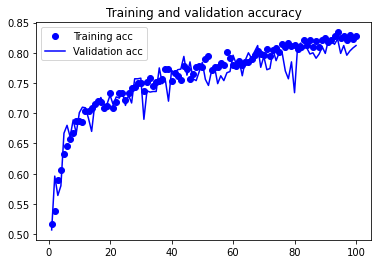

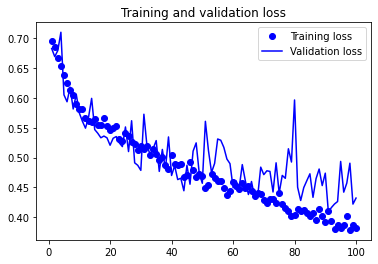

In [34]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()